# Credit Score Preprocessing and Modeling

## 1. Problem Definition

🎯 The goal of this challenge is to build a machine learning model that can classify the credit score, given a person’s credit-related information.

## 2. Data Collection

In [1]:
# pip install statsmodels

In [2]:
# 1. DATA MANIPULATION
import pandas as pd
import numpy as np

# 2. DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3. STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4. MACHINE LEARNING

## 4.1. Preprocessing

### 4.1.1. Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2. Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3. Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4. Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

In [3]:
# Import train data from KAGGLE
data_train_kaggle = pd.read_csv('raw_data/train_kaggle.csv', low_memory=False)
data_train = data_train_kaggle.copy()

# Import test data from KAGGLE
data_test_kaggle = pd.read_csv('raw_data/test_kaggle.csv', low_memory=False)
data_test = data_test_kaggle.copy()

In [4]:
# Display all columns
pd.set_option('display.max_columns', None)

## 3. Data Exploration

### 3.1 Initial Data Analysis

In [5]:
data_train.head(16)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [6]:
data_test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


👀 data_test does not contain the target variable 'Credit_Score'.

🔥 We will work exclusively with the training dataset.

In [7]:
df = data_train

In [8]:
df.shape

(100000, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


📝 <u>**DICTIONARY**</u>

👀 **_ think about correcting for all dataset i/o feature per feature**

- 🔴 **ID**: Represents a unique identification of an entry ***>>> Drop it - irrelevant <<<***
- 🟢 **Customer_ID**: Represents a unique identification of a person ***>>> Keep it <<<***
- 🟢 **Month**: Represents the month of the year ***>>> Keep it - month from Januray to August, encode it <<<***
- 🔴 **Name**: Represents the name of a person ***>>> Drop it - same as Customer_ID <<<***
- 🟢 **Age**: Represents the age of the person ***>>> Keep it - clean it <<<***
- 🔴 **SSN**: Represents the social security number of a person ***>>> Drop it - same as Customer_ID <<<***
- 🟢 **Occupation**: Represents the occupation of the person ***>>> Keep it - clean it, encode it <<<***
- 🟢 **Annual_Income**: Represents the annual income of the person ***>>> Keep it - clean it <<<***
- 🔴 **Monthly_Inhand_Salary**: Represents the monthly base salary of a person ***>>> Drop it - same as Annual_Income <<<***
- 🟢 **Num_Bank_Accounts**: Represents the number of bank accounts a person holds ***>>> Keep it - clean it (outliers) <<<***
- 🟢 **Num_Credit_Card**: Represents the number of other credit cards held by a person ***>>> Keep it - clean it (outliers) <<<***
- 🟢 **Interest_Rate**: Represents the interest rate on credit card ***>>> Keep it - clean it (outliers) <<<***
- 🟢 **Num_of_Loan**: Represents the number of loans taken from the bank ***>>> Keep it - clean it (outliers) <<<***
- 🔴 **Type_of_Loan**: Represents the types of loan taken by a person ***>>> Drop it - same as Annual_Income <<<***
- 🟢 **Delay_from_due_date**: Represents the average number of days delayed from the payment date ***>>> Keep it - clean it, check values <0 <<<***
- 🟢 **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person  ***>>> Keep it - clean it <<<***
- 🟢 **Changed_Credit_Limit**: Represents the percentage change in credit card limit ***>>> Keep it - consider a percentage change with respect to a baseline <<<***
- 🟢 **Num_Credit_Inquiries**: Represents the number of credit card inquiries ***>>> Keep it - clean it <<<***
- 🟢 **Credit_Mix**: Represents the classification of the mix of credits ***>>> Keep it - clean it, very important feature to show credit diversity <<<***
- 🟢 **Outstanding_Debt**: Represents the remaining debt to be paid (in USD) ***>>> Keep it - clean it <<<***
- 🟢 **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card ***>>> Keep it - focus on correlation investigation <<<***
- 🟢 **Credit_History_Age**: Represents the age of credit history of the person ***>>> Keep it - clean it <<<***
- 🟢 **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person ***>>> Keep it - clean it, consider that NM means No Minimum Value: 'No' is good <<<***
- 🟢 **Total_EMI_per_month**: Represents the monthly EMI payments (in USD) ***>>> Keep it - clean it, check 0 means customer does not owe anything <<<***
- 🟢 **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD) ***>>> Keep it - clean it <<<***
- 🟢 **Payment_Behaviour**: Represents the payment behavior of the customer (in USD) ***>>> Keep it - clean it, encode it, important feature <<<***
- 🟢 **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD) ***>>> Keep it - clean it <<<***
- 🟢 **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good) ***>>> Target <<<***

In [11]:
# Dropping
df = df.drop(['ID', 'Name', 'SSN', 'Monthly_Inhand_Salary', 'Type_of_Loan'], axis = 1)

In [12]:
df.shape

(100000, 23)

In [13]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
# df[df['Customer_ID'] == 'CUS_0xc65']

### 3.2. Defining the target $y$

In [15]:
y = df['Credit_Score']
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Credit_Score, dtype: object

In [16]:
y.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

## 4. Data Cleaning

### 4.1. Duplicates

In [17]:
duplicate_count = len(df) - len(df.drop_duplicates()) # Original data length minus data length without duplicates
duplicate_count

0

### 4.2. Special Characters

In [18]:
# Replace underscores with an empty string (remove them)
df = df.replace('_', '', regex=True)

In [19]:
# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

In [20]:
# Identify rows with empty values
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with NaN in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [21]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,January,23,Scientist,19114.12,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
1,CUS0xd40,February,23,Scientist,19114.12,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good
2,CUS0xd40,March,-500,Scientist,19114.12,3,4,3,4,3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
3,CUS0xd40,April,23,Scientist,19114.12,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good
4,CUS0xd40,May,23,Scientist,19114.12,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good


### 4.3. Missing Values

In [22]:
df.isna().sum().sort_values(ascending=False)

Credit_Mix                  20195
Credit_History_Age           9030
Occupation                   7062
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Monthly_Balance              1200
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Customer_ID                     0
Month                           0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Age                             0
Credit_Score                    0
dtype: int64

#### *_Credit_Mix_*

In [23]:
# Calculate the mode for each group
mode_by_Customer_ID = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_Mix' with the mode for each group
df['Credit_Mix'] = df['Credit_Mix'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(df['Credit_Mix'].isna().sum())

0


In [24]:
# Display the count of each unique value in 'Credit_Mix'
print(df['Credit_Mix'].value_counts())

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64


#### *_Credit_History_Age_*

In [25]:
# Map the target variable using the defined mapping
target_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}
df['Month'] = df['Month'].map(target_mapping)

# Display counts of unique values in 'Month'
df['Month'].value_counts()

Month
1    12500
2    12500
3    12500
4    12500
5    12500
6    12500
7    12500
8    12500
Name: count, dtype: int64

#### *Adjusting Months by Fernando Using Sine and Cosine Functions*

In [26]:
months_in_year = 12
df["sin_Month"] = np.sin(2*np.pi*df[["Month"]] / months_in_year)
df["cos_Month"] = np.cos(2*np.pi*df[["Month"]] / months_in_year)

In [27]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+)\s*Years?').astype(float)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+)\s*Months?').astype(float)

# Handle missing or NaN values
df['Credit_History_Years'] = df['Credit_History_Years'].fillna(0)
df['Credit_History_Months'] = df['Credit_History_Months'].fillna(0)

# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = (df['Credit_History_Years'] * 12 + df['Credit_History_Months']).astype(int)

# Drop the intermediate columns used for calculation (optional, if you no longer need them)
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

# Display counts of unique values in 'Credit_History_Age_Months'
value_counts = df['Credit_History_Age_Months'].value_counts()

# Replace 0 with NaN in the 'Credit_History_Age_Months' column
df['Credit_History_Age_Months'] = df['Credit_History_Age_Months'].replace(0, np.nan)

In [28]:
# Group by 'Customer_ID' and calculate the mean for 'Credit_History_Age_Months' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Credit_History_Age_Months'].transform(lambda x: x.mean())

# Fill NaN values in 'Credit_History_Age' with the mean for each group
df['Credit_History_Age_Months'] = df['Credit_History_Age_Months'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Credit_History_Age_Months'].isna().sum())

0


In [29]:
df.drop(columns=['Credit_History_Age'], inplace=True)

#### *_Occupation_*

In [30]:
# Calculate the mode for each group
mode_by_Customer_ID = df.groupby('Customer_ID')['Occupation'].transform(
    lambda x: x.mode()[0])

# Fill NaN values in 'Occupation' with the mode for each group
df['Occupation'] = df['Occupation'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(df['Occupation'].isna().sum())

0


#### *_Num_of_Delayed_Payment_*

In [31]:
# Convert Non-Numeric Values to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Num_of_Delayed_Payment' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mean())

# Fill NaN values in 'Num_of_Delayed_Payment' with the mean for each group
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Num_of_Delayed_Payment'].isna().sum())

0


#### *_Amount_invested_monthly_*

In [32]:
# Convert Non-Numeric Values to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Amount_invested_monthly' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mean())

# Fill NaN values in 'Amount_invested_monthly' with the mean for each group
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Amount_invested_monthly'].isna().sum())

0


#### *_Changed_Credit_Limit_*

In [33]:
# Convert Non-Numeric Values to NaN
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Changed_Credit_Limit' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.mean())

# Fill NaN values in 'Changed_Credit_Limit' with the mean for each group
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Changed_Credit_Limit'].isna().sum())

0


#### *_Num_Credit_Inquiries_*

In [34]:
# Convert Non-Numeric Values to NaN
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Num_Credit_Inquiries' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

# Fill NaN values in 'Num_Credit_Inquiries' with the mean for each group
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Num_Credit_Inquiries'].isna().sum())

0


#### *_Monthly_Balance_*

In [35]:
# Convert Non-Numeric Values to NaN
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Group by 'Customer_ID' and calculate the mean for 'Monthly_Balance' within each group
mean_by_Customer_ID = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.mean())

# Fill NaN values in 'Monthly_Balance' with the mean for each group
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(mean_by_Customer_ID)

# Display the count of missing values
print(df['Monthly_Balance'].isna().sum())

0


In [36]:
df.isna().sum().sort_values(ascending=False)

Customer_ID                  0
Credit_Mix                   0
cos_Month                    0
sin_Month                    0
Credit_Score                 0
Monthly_Balance              0
Payment_Behaviour            0
Amount_invested_monthly      0
Total_EMI_per_month          0
Payment_of_Min_Amount        0
Credit_Utilization_Ratio     0
Outstanding_Debt             0
Num_Credit_Inquiries         0
Month                        0
Changed_Credit_Limit         0
Num_of_Delayed_Payment       0
Delay_from_due_date          0
Num_of_Loan                  0
Interest_Rate                0
Num_Credit_Card              0
Num_Bank_Accounts            0
Annual_Income                0
Occupation                   0
Age                          0
Credit_History_Age_Months    0
dtype: int64

In [37]:
df.head(16)

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sin_Month,cos_Month,Credit_History_Age_Months
0,CUS0xd40,1,23,Scientist,19114.12,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,5.000000e-01,8.660254e-01,265.000000
1,CUS0xd40,2,23,Scientist,19114.12,3,4,3,4,-1,6.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good,8.660254e-01,5.000000e-01,268.333333
2,CUS0xd40,3,-500,Scientist,19114.12,3,4,3,4,3,7.0,10.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,1.000000e+00,6.123234e-17,267.000000
3,CUS0xd40,4,23,Scientist,19114.12,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,8.660254e-01,-5.000000e-01,268.000000
4,CUS0xd40,5,23,Scientist,19114.12,3,4,3,4,6,6.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,5.000000e-01,-8.660254e-01,269.000000
5,CUS0xd40,6,23,Scientist,19114.12,3,4,3,4,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,!@9#%8,340.479212,Good,1.224647e-16,-1.000000e+00,270.000000
6,CUS0xd40,7,23,Scientist,19114.12,3,4,3,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,Good,-5.000000e-01,-8.660254e-01,271.000000
7,CUS0xd40,8,23,Scientist,19114.12,3,4,3,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,HighspentMediumvaluepayments,358.124168,Standard,-8.660254e-01,-5.000000e-01,268.333333
8,CUS0x21b1,1,28,Teacher,34847.84,2,4,6,1,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,LowspentSmallvaluepayments,470.690627,Standard,5.000000e-01,8.660254e-01,319.000000
9,CUS0x21b1,2,28,Teacher,34847.84,2,4,6,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,HighspentLargevaluepayments,484.591214,Good,8.660254e-01,5.000000e-01,320.000000


### 4.4. Outliers

#### *_Age_*

In [38]:
df['Age'].value_counts(ascending=False)

Age
38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: count, Length: 1728, dtype: int64

In [39]:
# Convert Age column to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Replace values > 100 or < 0 with NaN
df.loc[(df['Age'] > 100) | (df['Age'] < 0), 'Age'] = np.nan

In [40]:
# Calculate the mode for each group
mode_by_Customer_ID = df.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Age' with the mode for each group
df['Age'] = df['Age'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(df['Age'].isna().sum())

0


In [41]:
df['Age'].value_counts(ascending=False)

Age
38.0     3071
28.0     3048
31.0     3035
26.0     3031
32.0     2966
36.0     2956
25.0     2954
27.0     2945
35.0     2938
39.0     2931
34.0     2918
44.0     2896
22.0     2892
19.0     2865
41.0     2861
20.0     2839
37.0     2832
29.0     2820
43.0     2813
30.0     2810
21.0     2789
24.0     2781
23.0     2726
45.0     2713
40.0     2690
42.0     2647
33.0     2625
18.0     2433
46.0     1672
15.0     1613
17.0     1553
16.0     1504
48.0     1425
49.0     1412
55.0     1398
53.0     1396
52.0     1387
54.0     1339
51.0     1331
50.0     1305
47.0     1254
14.0     1209
56.0      372
95.0        3
99.0        1
100.0       1
Name: count, dtype: int64

#### *_Annual_Income_*

In [42]:
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

#### *_Num_Bank_Accounts_*

In [43]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(float)
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [44]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0  # Replacing account balances less than zero with zero

In [45]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

In [46]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype(float)
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091490
std         117.404803
min           0.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

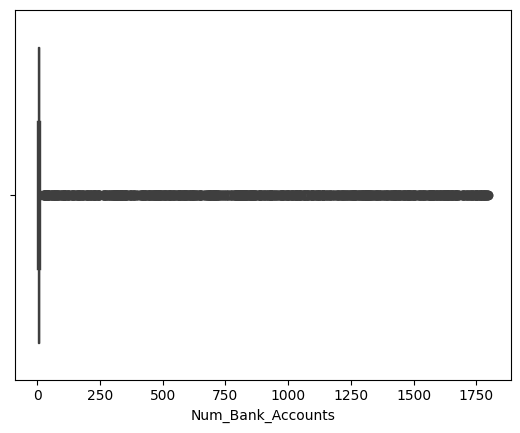

In [47]:
sns.boxplot(data= df, x = df['Num_Bank_Accounts']);

In [48]:
# Calculate IQR
Q1 = 3
Q3 = 7
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 19


In [49]:
# Convert feature column to numeric, coercing errors to NaN
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'], errors='coerce')

# Replace values greater than `Outlier` with NaN in `Num_Bank_Accounts` column
df.loc[(df['Num_Bank_Accounts'] > Outlier) | (df['Num_Bank_Accounts'] < 0), 'Num_Bank_Accounts'] = np.nan

# Calculate the mean `Num_Bank_Accounts` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mean())

# Fill NaN values in `Num_Bank_Accounts` with the mean for each `Customer_ID`
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Num_Bank_Accounts'].isna().sum())

0


#### *_Num_Credit_Card_*

In [50]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

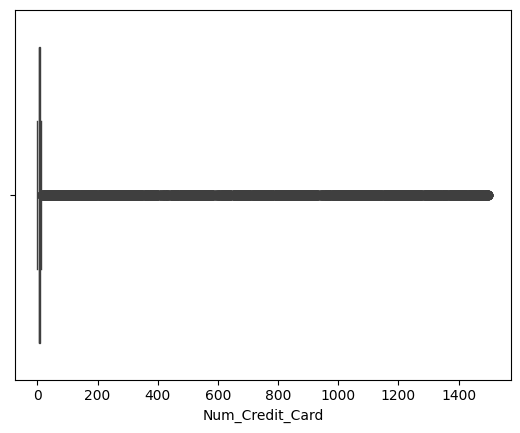

In [51]:
sns.boxplot(data= df, x = df['Num_Credit_Card']);

In [52]:
# Calculate IQR
Q1 = 4
Q3 = 7
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 16


In [53]:
# Convert feature column to numeric, coercing errors to NaN
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'], errors='coerce')

# Replace values greater than `Outlier` with NaN in `Num_Credit_Card` column
df.loc[(df['Num_Credit_Card'] > Outlier) | (df['Num_Credit_Card'] < 0), 'Num_Credit_Card'] = np.nan

# Calculate the mean `Num_Credit_Card` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.mean())

# Fill NaN values in `Num_Credit_Card` with the mean for each `Customer_ID`
df['Num_Credit_Card'] = df['Num_Credit_Card'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Num_Credit_Card'].isna().sum())

0


#### *_Interest_Rate_*

In [54]:
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

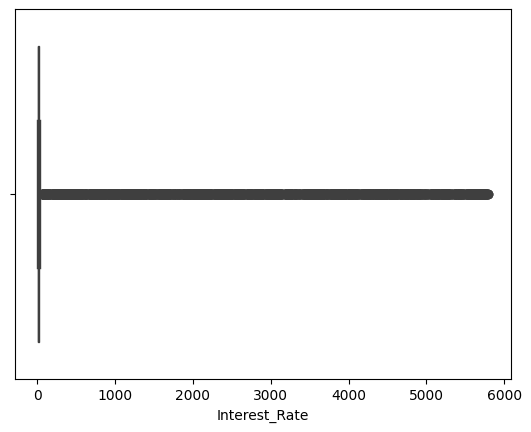

In [55]:
sns.boxplot(data= df, x = df['Interest_Rate']);

In [56]:
# Calculate IQR
Q1 = 8
Q3 = 20
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 56


In [57]:
# Convert feature column to numeric, coercing errors to NaN
df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'], errors='coerce')

# Replace values greater than `Outlier` or less than 0 with NaN in `Interest_Rate` column
df.loc[(df['Interest_Rate'] > Outlier) | (df['Interest_Rate'] < 0), 'Interest_Rate'] = np.nan

# Calculate the mean `Interest_Rate` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.mean())

# Fill NaN values in `Interest_Rate` with the mean for each `Customer_ID`
df['Interest_Rate'] = df['Interest_Rate'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Interest_Rate'].isna().sum())

0


#### *_Num_of_Loan_*

In [58]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

In [59]:
df.loc[df['Num_of_Loan']<0, 'Num_of_Loan'] = 0  # Replacing less than zero with zero

In [60]:
df['Num_of_Loan'].describe()

count    100000.000000
mean          6.885960
std          59.150621
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

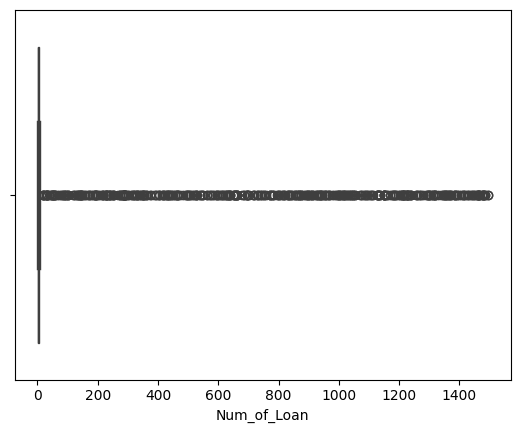

In [61]:
sns.boxplot(data= df, x = df['Num_of_Loan']);

In [62]:
# Calculate IQR
Q1 = 1
Q3 = 5
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 17


In [63]:
# Convert feature column to numeric, coercing errors to NaN
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')

# Replace values greater than `Outlier` with NaN in `Num_of_Loan` column
df.loc[(df['Num_of_Loan'] > Outlier) | (df['Num_of_Loan'] < 0), 'Num_of_Loan'] = np.nan

# Calculate the mean `Num_of_Loan` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.mean())

# Fill NaN values in `Num_of_Loan` with the mean for each `Customer_ID`
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Num_of_Loan'].isna().sum())

0


#### *_Delay_from_due_date_*

In [64]:
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')

In [65]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = 0  # Replacing less than zero with zero

In [66]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         21.081910
std          14.840204
min           0.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

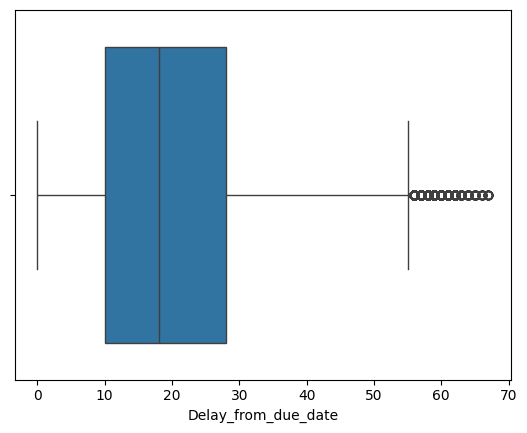

In [67]:
sns.boxplot(data= df, x = df['Delay_from_due_date']);

In [68]:
# Calculate IQR
Q1 = 10
Q3 = 28
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 82


In [69]:
# Convert feature column to numeric, coercing errors to NaN
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')

# Replace values greater than `Outlier` or less than 0 with NaN in `Delay_from_due_date` column
df.loc[(df['Delay_from_due_date'] > Outlier) | (df['Delay_from_due_date'] < 0), 'Delay_from_due_date'] = np.nan

# Calculate the mean `Delay_from_due_date` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Delay_from_due_date'].transform(lambda x: x.mean())

# Fill NaN values in `Delay_from_due_date` with the mean for each `Customer_ID`
df['Delay_from_due_date'] = df['Delay_from_due_date'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Delay_from_due_date'].isna().sum())

0


#### *_Num_of_Delayed_Payment_*

In [70]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [71]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = 0  # Replacing less than zero with zero

In [72]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.902194
std         219.235110
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

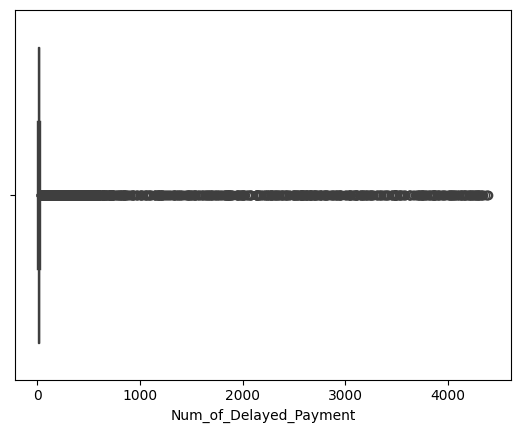

In [73]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);

In [74]:
# Calculate IQR
Q1 = 9
Q3 = 18
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 45


In [75]:
# Convert feature column to numeric, coercing errors to NaN
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Replace values greater than `Outlier` with NaN in `Num_of_Delayed_Payment` column
df.loc[(df['Num_of_Delayed_Payment'] > Outlier) | (df['Num_of_Delayed_Payment'] < 0), 'Num_of_Delayed_Payment'] = np.nan

# Calculate the mean `Num_of_Delayed_Payment` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mean())

# Fill NaN values in `Num_of_Delayed_Payment` with the mean for each `Customer_ID`
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Num_of_Delayed_Payment'].isna().sum())

0


#### *_Changed_Credit_Limit_*

In [76]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [77]:
df.loc[df['Changed_Credit_Limit']<0, 'Changed_Credit_Limit'] = 0  # Replacing less than zero with zero

In [78]:
df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.426114
std           6.716428
min           0.000000
25%           5.340000
50%           9.400000
75%          14.850000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

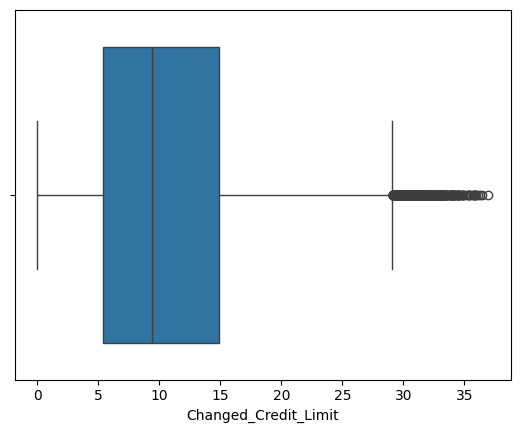

In [79]:
sns.boxplot(data= df, x = df['Changed_Credit_Limit']);

In [80]:
# Calculate IQR
Q1 = 5.34
Q3 = 14.85
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 43.38


In [81]:
# Convert feature column to numeric, coercing errors to NaN
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# Replace values greater than `Outlier` and negative values with NaN in `Changed_Credit_Limit` column
df.loc[(df['Changed_Credit_Limit'] > Outlier) | (df['Changed_Credit_Limit'] < 0), 'Changed_Credit_Limit'] = np.nan

# Calculate the mean `Changed_Credit_Limit` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.mean())

# Fill NaN values in `Changed_Credit_Limit` with the mean for each `Customer_ID`
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Changed_Credit_Limit'].isna().sum())

0


#### *_Num_Credit_Inquiries_*

In [82]:
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

In [83]:
df.loc[df['Num_Credit_Inquiries']<0, 'Num_Credit_Inquiries'] = 0  # Replacing less than zero with zero

In [84]:
df['Num_Credit_Inquiries'].describe()

count    100000.000000
mean         27.695146
std         191.509185
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

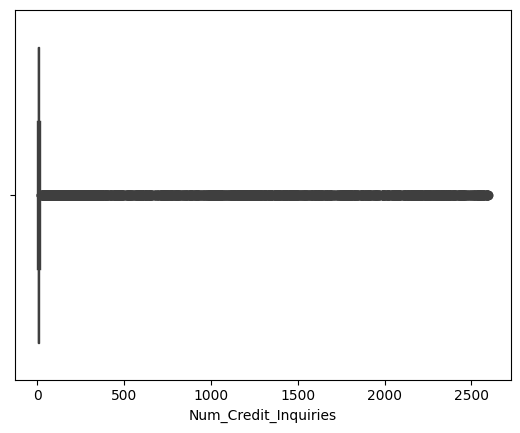

In [85]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);

In [86]:
# Calculate IQR
Q1 = 3
Q3 = 9
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 27


In [87]:
# Convert feature column to numeric, coercing errors to NaN
df['Num_Credit_Inquiries'] = pd.to_numeric(df['Num_Credit_Inquiries'], errors='coerce')

# Replace values greater than `Outlier` and negative values with NaN in `Num_Credit_Inquiries` column
df.loc[(df['Num_Credit_Inquiries'] > Outlier) | (df['Num_Credit_Inquiries'] < 0), 'Num_Credit_Inquiries'] = np.nan

# Calculate the mean `Num_Credit_Inquiries` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.mean())

# Fill NaN values in `Num_Credit_Inquiries` with the mean for each `Customer_ID`
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Num_Credit_Inquiries'].isna().sum())

0


#### *_Credit_Mix_*

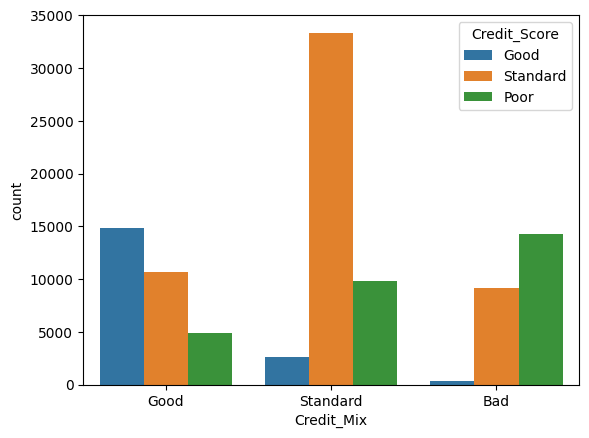

In [88]:
sns.countplot(data=df, x='Credit_Mix', hue='Credit_Score');

#### *_Outstanding_Debt_*

In [89]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [90]:
df.loc[df['Outstanding_Debt']<0, 'Outstanding_Debt'] = 0  # Replacing less than zero with zero

In [91]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

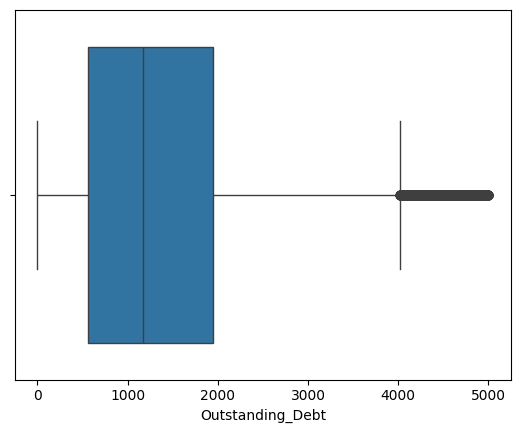

In [92]:
sns.boxplot(data= df, x = df['Outstanding_Debt']);

In [93]:
# Calculate IQR
Q1 = 566.072500
Q3 = 1945.962500
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 6085.6325


In [94]:
# Convert feature column to numeric, coercing errors to NaN
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

# Replace values greater than `Outlier` and negative values with NaN in `Outstanding_Debt` column
df.loc[(df['Outstanding_Debt'] > Outlier) | (df['Outstanding_Debt'] < 0), 'Outstanding_Debt'] = np.nan

# Calculate the mean `Outstanding_Debt` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Outstanding_Debt'].transform(lambda x: x.mean())

# Fill NaN values in `Outstanding_Debt` with the mean for each `Customer_ID`
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Outstanding_Debt'].isna().sum())

0


#### *_Credit_Utilization_Ratio_*

In [95]:
df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

In [96]:
df.loc[df['Credit_Utilization_Ratio']<0, 'Credit_Utilization_Ratio'] = 0  # Replacing less than zero with zero

In [97]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

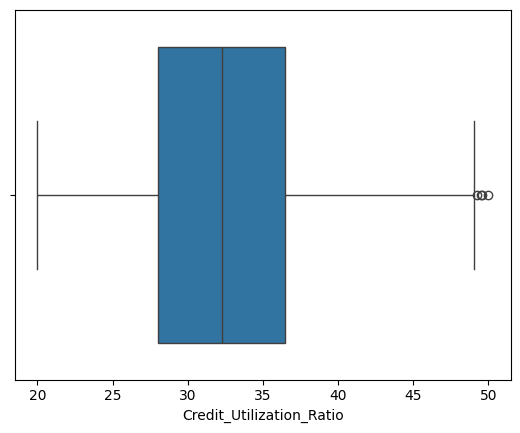

In [98]:
sns.boxplot(data= df, x = df['Credit_Utilization_Ratio']);

In [99]:
# Calculate IQR
Q1 = 28.052567
Q3 = 36.496663
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 61.82895099999999


In [100]:
# Convert feature column to numeric, coercing errors to NaN
df['Credit_Utilization_Ratio'] = pd.to_numeric(df['Credit_Utilization_Ratio'], errors='coerce')

# Replace values greater than `Outlier` and negative values with NaN in `Credit_Utilization_Ratio` column
df.loc[(df['Credit_Utilization_Ratio'] > Outlier) | (df['Credit_Utilization_Ratio'] < 0), 'Credit_Utilization_Ratio'] = np.nan

# Calculate the mean `Credit_Utilization_Ratio` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Credit_Utilization_Ratio'].transform(lambda x: x.mean())

# Fill NaN values in `Credit_Utilization_Ratio` with the mean for each `Customer_ID`
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Credit_Utilization_Ratio'].isna().sum())

0


#### *_Payment_of_Min_Amount_*

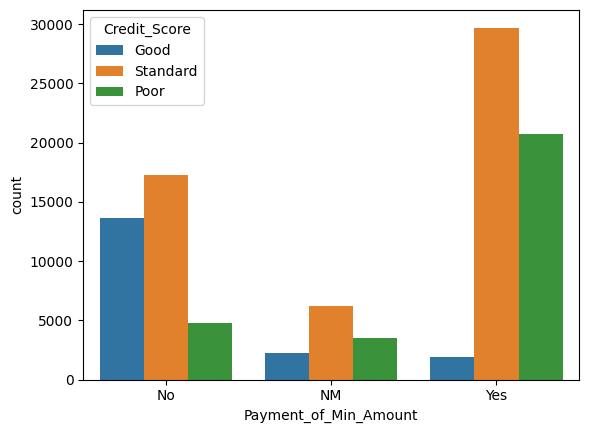

In [101]:
sns.countplot(data=df, x='Payment_of_Min_Amount', hue='Credit_Score');

#### *_Total_EMI_per_month_*

In [102]:
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')

In [103]:
df.loc[df['Total_EMI_per_month']<0, 'Total_EMI_per_month'] = 0  # Replacing less than zero with zero

In [104]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

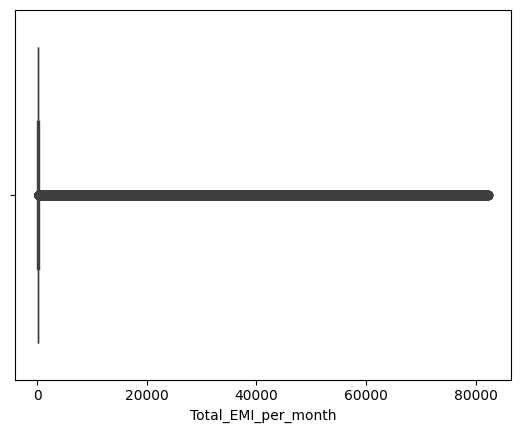

In [105]:
sns.boxplot(data= df, x = df['Total_EMI_per_month']);

In [106]:
# Calculate IQR
Q1 = 30.306660
Q3 = 161.224249
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 553.9770159999999


In [107]:
# Convertir la colonne 'Total_EMI_per_month' en numérique, en remplaçant les erreurs par NaN
df['Total_EMI_per_month'] = pd.to_numeric(df['Total_EMI_per_month'], errors='coerce')

# Remplacer les valeurs supérieures à `Outlier` et les valeurs négatives dans 'Total_EMI_per_month' par NaN
df.loc[(df['Total_EMI_per_month'] > Outlier) | (df['Total_EMI_per_month'] < 0), 'Total_EMI_per_month'] = np.nan

# Calculer la moyenne des valeurs de 'Total_EMI_per_month' pour chaque 'Customer_ID'
mean_by_Customer_ID = df.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.mean())

# Remplir les NaN dans 'Total_EMI_per_month' avec la moyenne pour chaque 'Customer_ID'
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].fillna(mean_by_Customer_ID)

# Afficher le nombre de valeurs manquantes restantes dans 'Total_EMI_per_month'
print(df['Total_EMI_per_month'].isna().sum())

200


In [108]:
df[df['Total_EMI_per_month'].isna()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,sin_Month,cos_Month,Credit_History_Age_Months
384,CUS0x9b3c,1,43.0,Lawyer,81842.28,10.0,9.0,25.0,9.0,20.0,19.0,16.25,9.0,Bad,3053.16,39.430166,NM,NaN,162.588724,HighspentMediumvaluepayments,194.364478,Standard,5.000000e-01,8.660254e-01,4.000000
385,CUS0x9b3c,2,43.0,Lawyer,81842.28,10.0,9.0,25.0,9.0,20.0,16.0,16.25,9.0,Bad,3053.16,26.050885,Yes,NaN,152.733766,!@9#%8,204.219436,Standard,8.660254e-01,5.000000e-01,5.000000
386,CUS0x9b3c,3,43.0,Lawyer,81842.28,10.0,9.0,25.0,9.0,20.0,19.0,16.25,9.0,Bad,3053.16,24.070080,Yes,NaN,192.473115,HighspentSmallvaluepayments,174.480087,Standard,1.000000e+00,6.123234e-17,6.000000
387,CUS0x9b3c,4,43.0,Lawyer,81842.28,10.0,9.0,25.0,9.0,20.0,16.0,14.25,9.0,Bad,3053.16,27.926610,Yes,NaN,332.913124,HighspentSmallvaluepayments,34.040078,Standard,8.660254e-01,-5.000000e-01,7.000000
388,CUS0x9b3c,5,43.0,Lawyer,81842.28,10.0,9.0,25.0,9.0,20.0,17.0,16.25,11.0,Bad,3053.16,31.317433,Yes,NaN,447.848578,LowspentMediumvaluepayments,177.372399,Standard,5.000000e-01,-8.660254e-01,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94627,CUS0xa362,4,15.0,Lawyer,123947.36,8.0,5.0,17.0,6.0,15.0,17.0,9.51,9.0,Standard,145.03,39.586012,Yes,NaN,162.028354,HighspentLargevaluepayments,502.379619,Standard,8.660254e-01,-5.000000e-01,221.000000
94628,CUS0xa362,5,15.0,Lawyer,123947.36,8.0,5.0,17.0,6.0,20.0,18.0,9.51,9.0,Standard,145.03,23.380136,Yes,NaN,390.094476,HighspentMediumvaluepayments,284.313497,Standard,5.000000e-01,-8.660254e-01,222.000000
94629,CUS0xa362,6,15.0,Lawyer,16681206.00,8.0,5.0,17.0,6.0,15.0,19.0,9.51,9.0,Standard,145.03,30.793906,Yes,NaN,10000.000000,HighspentSmallvaluepayments,126.018751,Standard,1.224647e-16,-1.000000e+00,223.000000
94630,CUS0xa362,7,15.0,Lawyer,123947.36,8.0,5.0,17.0,6.0,19.0,18.5,9.51,9.0,Standard,145.03,40.827681,Yes,NaN,181.485627,HighspentSmallvaluepayments,502.922346,Standard,-5.000000e-01,-8.660254e-01,221.142857


In [109]:
# df[df['Customer_ID'] == 'CUS0xc65']

#### *_Amount_invested_Outlier_*

In [110]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [111]:
df.loc[df['Amount_invested_monthly']<0, 'Amount_invested_monthly'] = 0  # Replacing less than zero with zero

In [112]:
df['Amount_invested_monthly'].describe()

count    100000.000000
mean        637.569686
std        2004.193171
min           0.000000
25%          76.057014
50%         138.495050
75%         274.671232
max       10000.000000
Name: Amount_invested_monthly, dtype: float64

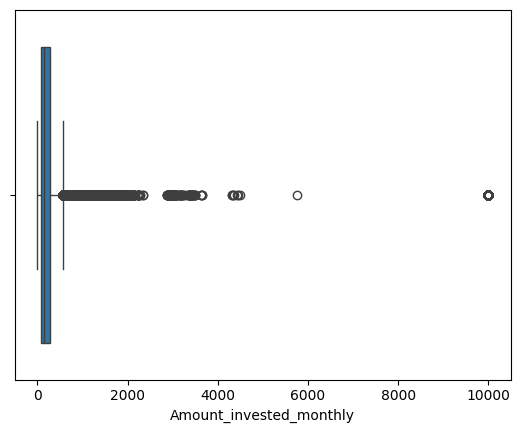

In [113]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);

In [114]:
# Calculate IQR
Q1 = 76.057014
Q3 = 274.671232
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 870.513886


In [115]:
# Convert feature column to numeric, coercing errors to NaN
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

# Replace values greater than `Outlier` and negative values with NaN in `Amount_invested_monthly` column
df.loc[(df['Amount_invested_monthly'] > Outlier) | (df['Amount_invested_monthly'] < 0), 'Amount_invested_monthly'] = np.nan

# Calculate the mean `Amount_invested_monthly` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mean())

# Fill NaN values in `Amount_invested_monthly` with the mean for each `Customer_ID`
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Amount_invested_monthly'].isna().sum())

0


#### *_Payment_Behaviour_*

In [116]:
df['Payment_Behaviour'].value_counts(ascending=False)

Payment_Behaviour
LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
!@9#%8                           7600
Name: count, dtype: int64

In [117]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)

/var/folders/4z/xf8fk57j79jgxxzv6g885xtm0000gn/T/ipykernel_13117/2261259717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)


In [118]:
df['Payment_Behaviour'].value_counts(ascending=False)

Payment_Behaviour
LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
Name: count, dtype: int64

In [119]:
# Calculate the mode for each group
mode_by_Customer_ID = df.groupby('Customer_ID')['Payment_Behaviour'].transform(
    lambda x: x.mode()[0])

# Fill NaN values in 'Occupation' with the mode for each group
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(mode_by_Customer_ID)

# Display the count of missing values
print(df['Payment_Behaviour'].isna().sum())

0


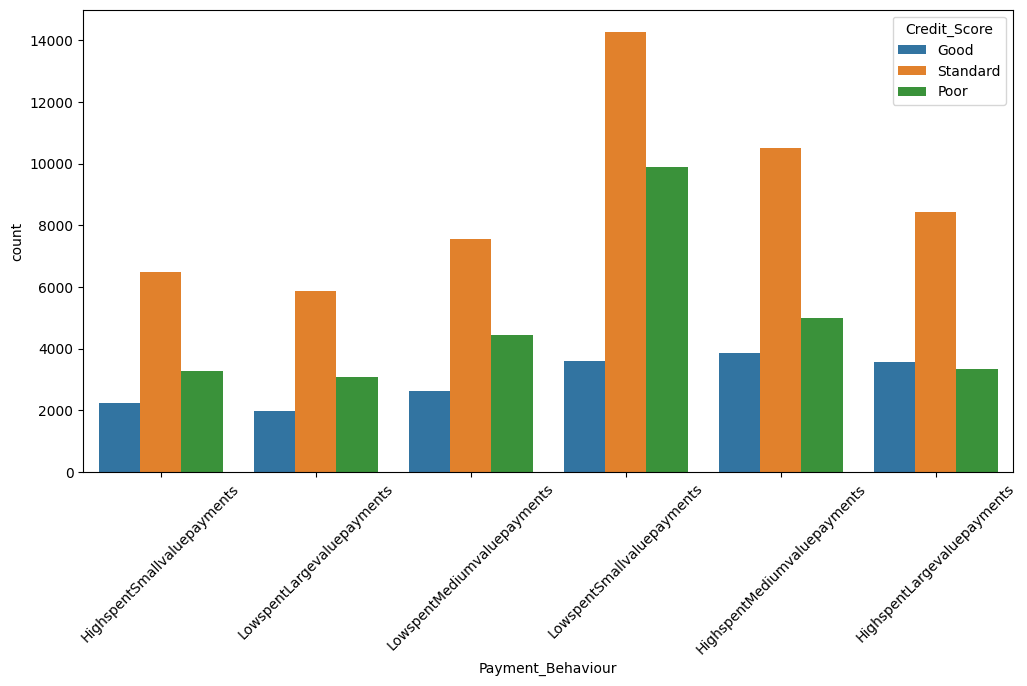

In [120]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Payment_Behaviour', hue='Credit_Score')
plt.xticks(rotation=45);

#### *_Monthly_Balance_*

In [121]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [122]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = 0  # Replacing less than zero with zero

In [123]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        403.081534
std         214.040199
min           0.000000
25%         270.153757
50%         337.107086
75%         471.557903
max        1602.040519
Name: Monthly_Balance, dtype: float64

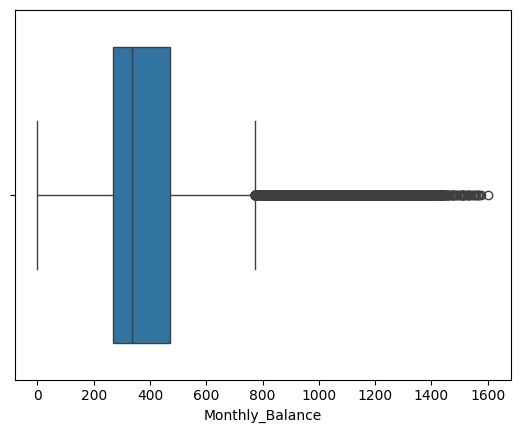

In [124]:
sns.boxplot(data= df, x = df['Monthly_Balance']);

In [125]:
# Calculate IQR
Q1 = 267.992189
Q3 = 467.673454
IQR = Q3 - Q1

# Calculate the outlier value
Outlier = Q3 + 3 * IQR
print(f'The outlier value is: {Outlier}')

The outlier value is: 1066.717249


In [126]:
# Convert feature column to numeric, coercing errors to NaN
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

# Replace values greater than `Outlier` or less than 0 with NaN in `Monthly_Balance` column
df.loc[(df['Monthly_Balance'] > Outlier) | (df['Monthly_Balance'] < 0), 'Monthly_Balance'] = np.nan

# Calculate the mean `Monthly_Balance` for each `Customer_ID`
mean_by_Customer_ID = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.mean())

# Fill NaN values in `Monthly_Balance` with the mean for each `Customer_ID`
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(mean_by_Customer_ID)

# Display the count of missing values remaining
print(df['Monthly_Balance'].isna().sum())

8


#### *_Credit_History_Age_Months_*

In [127]:
df['Credit_History_Age_Months'] = pd.to_numeric(df['Credit_History_Age_Months'], errors='coerce')

In [128]:
df.loc[df['Credit_History_Age_Months']<0, 'Credit_History_Age_Months'] = 0  # Replacing less than zero with zero

In [129]:
df['Credit_History_Age_Months'].describe()

count    100000.000000
mean        221.205838
std          99.677965
min           1.000000
25%         144.333333
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age_Months, dtype: float64

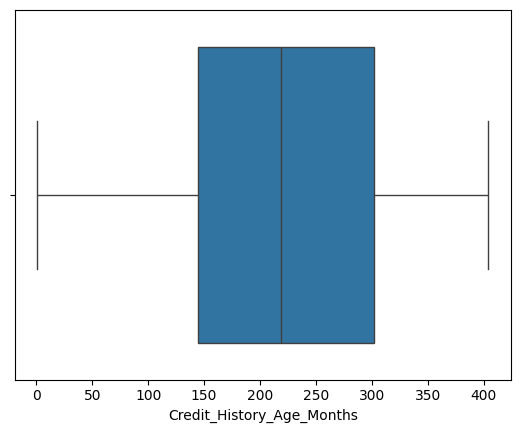

In [130]:
sns.boxplot(data= df, x = df['Credit_History_Age_Months']);

## 5. Data Transformation

### 5.1. Defining the features $X$

In [131]:
df.drop(columns=['Customer_ID'], inplace=True)
df.drop(columns=['Month'], inplace=True)
X = df.drop(columns=['Credit_Score'])
X.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,0.500000,8.660254e-01,265.000000
1,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,0.866025,5.000000e-01,268.333333
2,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,10.27,4.0,Good,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,1.000000,6.123234e-17,267.000000
3,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,0.866025,-5.000000e-01,268.000000
4,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,0.500000,-8.660254e-01,269.000000


In [132]:
X.isna().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month          200
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                8
sin_Month                      0
cos_Month                      0
Credit_History_Age_Months      0
dtype: int64

### 5.2. Scaling numerical features

In [133]:
numerical_features = X.select_dtypes(exclude=['object'])
numerical_features

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,5.000000e-01,8.660254e-01,265.000000
1,23.0,19114.12,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,8.660254e-01,5.000000e-01,268.333333
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,10.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,1.000000e+00,6.123234e-17,267.000000
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,8.660254e-01,-5.000000e-01,268.000000
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,5.000000e-01,-8.660254e-01,269.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228,8.660254e-01,-5.000000e-01,378.000000
99996,25.0,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610,5.000000e-01,-8.660254e-01,379.000000
99997,25.0,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083,1.224647e-16,-1.000000e+00,380.000000
99998,25.0,39628.99,4.0,6.0,7.0,2.0,20.0,6.4,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.164979,-5.000000e-01,-8.660254e-01,381.000000


In [134]:
from sklearn.impute import KNNImputer

# Créer une instance de KNNImputer avec 2 voisins
imputer = KNNImputer(n_neighbors=2)

# Ajuster l'imputer aux données et transformer les valeurs manquantes
imputed_data = imputer.fit_transform(numerical_features)

# Convertir le résultat en DataFrame
numerical_features = pd.DataFrame(imputed_data, columns=numerical_features.columns)

In [135]:
numerical_features.isna().sum()

Age                          0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Total_EMI_per_month          0
Amount_invested_monthly      0
Monthly_Balance              0
sin_Month                    0
cos_Month                    0
Credit_History_Age_Months    0
dtype: int64

In [136]:
numerical_features

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,5.000000e-01,8.660254e-01,265.000000
1,23.0,19114.12,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,8.660254e-01,5.000000e-01,268.333333
2,23.0,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,10.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863,1.000000e+00,6.123234e-17,267.000000
3,23.0,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,8.660254e-01,-5.000000e-01,268.000000
4,23.0,19114.12,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,5.000000e-01,-8.660254e-01,269.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228,8.660254e-01,-5.000000e-01,378.000000
99996,25.0,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610,5.000000e-01,-8.660254e-01,379.000000
99997,25.0,39628.99,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083,1.224647e-16,-1.000000e+00,380.000000
99998,25.0,39628.99,4.0,6.0,7.0,2.0,20.0,6.4,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.164979,-5.000000e-01,-8.660254e-01,381.000000


In [137]:
print('\n'.join(numerical_features.columns))

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance
sin_Month
cos_Month
Credit_History_Age_Months


In [138]:
# Instantiate the RobustScaler
robust_scaler = RobustScaler().set_output(transform='pandas')

# Pass the data (not the column name) to fit_transform
numerical_features_scaled = robust_scaler.fit_transform(numerical_features)

# Showing the scaled features
numerical_features_scaled

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months
0,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,-0.258118,-0.649349,-0.142087,-0.310616,-0.121910,0.000000,1.378396e+00,0.291755
1,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,-0.258118,-0.042731,-0.142087,-0.078987,-0.261045,0.369340,1.009056e+00,0.312896
2,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,-0.258118,-0.437753,-0.142087,-0.302760,-0.028459,0.504528,5.045279e-01,0.304440
3,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.722222,-1.111111,-0.329127,-0.2,-0.258118,-0.109890,-0.142087,0.417597,-0.566518,0.369340,2.800693e-16,0.310782
4,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.666667,-0.888889,0.196635,-0.2,-0.258118,-0.889194,-0.142087,-0.549159,0.022868,0.000000,-3.693401e-01,0.317125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.277778,-0.777778,0.220820,-0.4,-0.481035,0.279223,-0.267499,-0.429559,0.713811,0.369340,2.800693e-16,1.008457
99996,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.000000,-0.777778,0.220820,-0.4,-0.481035,0.978180,-0.267499,-0.471067,0.797624,0.000000,-3.693401e-01,1.014799
99997,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.500000,-0.888889,0.220820,-0.4,-0.481035,1.059881,-0.267499,-0.655548,0.898274,-0.504528,-5.045279e-01,1.021142
99998,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.111111,-0.844444,0.220820,-0.4,-0.481035,0.157794,-0.267499,0.737005,-0.088601,-1.009056,-3.693401e-01,1.027484


### 5.3. Encoding categorical features

In [139]:
categorical_features = X.select_dtypes(include=['object'])
categorical_features

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,Good,No,HighspentSmallvaluepayments
1,Scientist,Good,No,LowspentLargevaluepayments
2,Scientist,Good,No,LowspentMediumvaluepayments
3,Scientist,Good,No,LowspentSmallvaluepayments
4,Scientist,Good,No,HighspentMediumvaluepayments
...,...,...,...,...
99995,Mechanic,Good,No,HighspentLargevaluepayments
99996,Mechanic,Good,No,HighspentMediumvaluepayments
99997,Mechanic,Good,No,HighspentLargevaluepayments
99998,Mechanic,Good,No,LowspentLargevaluepayments


In [140]:
print('\n'.join(categorical_features.columns))

Occupation
Credit_Mix
Payment_of_Min_Amount
Payment_Behaviour


In [141]:
# Instantiating the OHE
ohe = OneHotEncoder(drop="if_binary", sparse_output=False, min_frequency=0.05).set_output(transform='pandas')

# Fitting it to the categorical features
ohe.fit(categorical_features)

# Printing the different categories detected by the OHE
display(ohe.categories_)

# Since Sklearn 1.1, you can retrieve the names of the generated columns
display(ohe.get_feature_names_out())

# Storing the encoded features
encoded_features = ohe.transform(categorical_features)

[array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
        'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
        'MediaManager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
       dtype=object),
 array(['Bad', 'Good', 'Standard'], dtype=object),
 array(['NM', 'No', 'Yes'], dtype=object),
 array(['HighspentLargevaluepayments', 'HighspentMediumvaluepayments',
        'HighspentSmallvaluepayments', 'LowspentLargevaluepayments',
        'LowspentMediumvaluepayments', 'LowspentSmallvaluepayments'],
       dtype=object)]

array(['Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_MediaManager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer',
       'Credit_Mix_Bad', 'Credit_Mix_Good', 'Credit_Mix_Standard',
       'Payment_of_Min_Amount_NM', 'Payment_of_Min_Amount_No',
       'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_HighspentLargevaluepayments',
       'Payment_Behaviour_HighspentMediumvaluepayments',
       'Payment_Behaviour_HighspentSmallvaluepayments',
       'Payment_Behaviour_LowspentLargevaluepayments',
       'Payment_Behaviour_LowspentMediumvaluepayments',
       'Payment_Behaviour_LowspentSmallvaluepayments'], dtype=object)

## 6. Concatenating all the preprocessed features together $X_{preprocessed}$

In [142]:
X_preprocessed = pd.concat([numerical_features_scaled, encoded_features], axis=1)
X_preprocessed

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments
0,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,-0.258118,-0.649349,-0.142087,-0.310616,-0.121910,0.000000,1.378396e+00,0.291755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,-0.258118,-0.042731,-0.142087,-0.078987,-0.261045,0.369340,1.009056e+00,0.312896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,-0.258118,-0.437753,-0.142087,-0.302760,-0.028459,0.504528,5.045279e-01,0.304440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.722222,-1.111111,-0.329127,-0.2,-0.258118,-0.109890,-0.142087,0.417597,-0.566518,0.369340,2.800693e-16,0.310782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.666667,-0.888889,0.196635,-0.2,-0.258118,-0.889194,-0.142087,-0.549159,0.022868,0.000000,-3.693401e-01,0.317125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.277778,-0.777778,0.220820,-0.4,-0.481035,0.279223,-0.267499,-0.429559,0.713811,0.369340,2.800693e-16,1.008457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.000000,-0.777778,0.220820,-0.4,-0.481035,0.978180,-0.267499,-0.471067,0.797624,0.000000,-3.693401e-01,1.014799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.500000,-0.888889,0.220820,-0.4,-0.481035,1.059881,-0.267499,-0.655548,0.898274,-0.504528,-5.045279e-01,1.021142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99998,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.111111,-0.844444,0.220820,-0.4,-0.481035,0.157794,-0.267499,0.737005,-0.088601,-1.009056,-3.693401e-01,1.027484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 7. Encoding the target $y_{encoded}$

In [143]:
# from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

pd.DataFrame({"target": y, "encoded_target": y_encoded}).sample(10)

,target,encoded_target
28519,Good,0
53393,Good,0
54026,Poor,1
96101,Standard,2
10453,Standard,2
93900,Standard,2
2414,Poor,1
41730,Poor,1
75641,Standard,2
58331,Good,0


## 8. Saving the preprocessed dataset $df_{preprocessed}$

In [144]:
df_preprocessed = pd.concat([X_preprocessed, pd.DataFrame({'Credit_Score': y_encoded})], axis=1)
df_preprocessed

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,-0.258118,-0.649349,-0.142087,-0.310616,-0.121910,0.000000,1.378396e+00,0.291755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,-0.258118,-0.042731,-0.142087,-0.078987,-0.261045,0.369340,1.009056e+00,0.312896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,-0.258118,-0.437753,-0.142087,-0.302760,-0.028459,0.504528,5.045279e-01,0.304440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.722222,-1.111111,-0.329127,-0.2,-0.258118,-0.109890,-0.142087,0.417597,-0.566518,0.369340,2.800693e-16,0.310782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.346209,-0.50,-0.333333,-0.769231,0.25,-0.666667,-0.888889,0.196635,-0.2,-0.258118,-0.889194,-0.142087,-0.549159,0.022868,0.000000,-3.693401e-01,0.317125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.277778,-0.777778,0.220820,-0.4,-0.481035,0.279223,-0.267499,-0.429559,0.713811,0.369340,2.800693e-16,1.008457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99996,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.000000,-0.777778,0.220820,-0.4,-0.481035,0.978180,-0.267499,-0.471067,0.797624,0.000000,-3.693401e-01,1.014799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
99997,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.500000,-0.888889,0.220820,-0.4,-0.481035,1.059881,-0.267499,-0.655548,0.898274,-0.504528,-5.045279e-01,1.021142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
99998,-0.444444,0.038445,-0.25,0.333333,-0.461538,-0.25,0.111111,-0.844444,0.220820,-0.4,-0.481035,0.157794,-0.267499,0.737005,-0.088601,-1.009056,-3.693401e-01,1.027484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [145]:
print('\n'.join(df_preprocessed.columns))

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Num_of_Delayed_Payment
Changed_Credit_Limit
Num_Credit_Inquiries
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month
Amount_invested_monthly
Monthly_Balance
sin_Month
cos_Month
Credit_History_Age_Months
Occupation_Accountant
Occupation_Architect
Occupation_Developer
Occupation_Doctor
Occupation_Engineer
Occupation_Entrepreneur
Occupation_Journalist
Occupation_Lawyer
Occupation_Manager
Occupation_Mechanic
Occupation_MediaManager
Occupation_Musician
Occupation_Scientist
Occupation_Teacher
Occupation_Writer
Credit_Mix_Bad
Credit_Mix_Good
Credit_Mix_Standard
Payment_of_Min_Amount_NM
Payment_of_Min_Amount_No
Payment_of_Min_Amount_Yes
Payment_Behaviour_HighspentLargevaluepayments
Payment_Behaviour_HighspentMediumvaluepayments
Payment_Behaviour_HighspentSmallvaluepayments
Payment_Behaviour_LowspentLargevaluepayments
Payment_Behaviour_LowspentMediumvaluepayments
Payment_Behaviour_Lowspen

In [146]:
# Export
df_preprocessed.to_csv('raw_data/df_preprocessed_27082024.csv', index=False)

## 9. Splitting the dataset

In [147]:
X = X_preprocessed

In [148]:
y = y_encoded

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 45), (30000, 45), (70000,), (30000,))

## 10. Running our Best Model XGBoost

In [150]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define Hyperparameters
param_grid = {
    'n_estimators': [565],
    'max_depth': [38],
    'learning_rate': [0.099],
    'subsample': [1],
    'colsample_bytree': [0.65],
    'gamma': [0],
    'min_child_weight': [0.2]
}

# Instantiate XGBoost
xgb = XGBClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    xgb,
    param_grid,
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',  # Accuracy as the metric
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Train the model
grid_search.fit(X_train, y_train)

# Evaluate the model
grid_search.score(X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


0.8286

In [151]:
grid_search.best_params_

{'colsample_bytree': 0.65,
 'gamma': 0,
 'learning_rate': 0.099,
 'max_depth': 38,
 'min_child_weight': 0.2,
 'n_estimators': 565,
 'subsample': 1}

In [152]:
best_xgb_5 = grid_search.best_estimator_
best_xgb_5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.65, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.099, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=0.2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=565, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [153]:
import pickle

# Save the model without compression
file_name = 'raw_data/best_xgb_5.sav'
with open(file_name, 'wb') as f:
    pickle.dump(best_xgb_5, f)

# Load the model without compression
with open(file_name, 'rb') as f:
    loaded_model = pickle.load(f)

# Verify the loaded model
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.65, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.099, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=0.2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=565, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 11. Plotting the Learning Curves

In [154]:
X_train.shape

(70000, 45)

In [155]:
y_train.shape

(70000,)

In [156]:
# pip install --upgrade --force-reinstall matplotlib

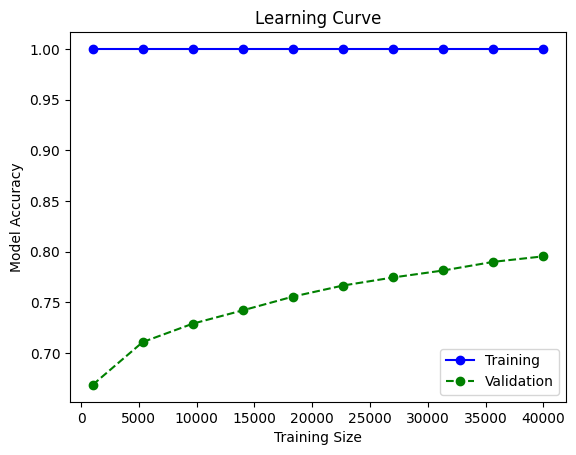

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate training sizes and calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(best_xgb_5, X_train, y_train, 
                                                        train_sizes=np.linspace(1000, 40000, 10, dtype=int), 
                                                        cv=5)

# Calculate mean scores across the folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training')
plt.plot(train_sizes, test_scores_mean, 'o--', color='green', label='Validation')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

## 12. Commit

In [161]:
# '''
!git add credit_score_preprocessing_and_modeling.ipynb
!git commit -m "credit_score_preprocessing_and_modeling.ipynb"
!git push origin greg_branch
# '''

On branch greg_branch
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   .DS_Store
	modified:   credit_score (untracked content)

no changes added to commit (use "git add" and/or "git commit -a")
To github.com:monrosegregory/credit_score.git
 ! [rejected]        greg_branch -> greg_branch (non-fast-forward)
error: failed to push some refs to 'github.com:monrosegregory/credit_score.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. If you want to integrate the remote changes,
hint: use 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
